In [1]:
import pandas as pd
import numpy as np

In [2]:
from pathlib import Path

In [3]:
dPath = Path("../docs/dumps")

In [4]:
import pickle

In [64]:
with open(dPath / "train_data.pkl", 'rb') as filename:
    train_data = pickle.load(filename)

In [6]:
li = []
for file in train_files:
    df = pd.read_csv(file)
    df = df.replace('?',np.NaN)
    df[df.columns[3:]] = df[df.columns[3:]].apply(pd.to_numeric)
    df.dropna(inplace=True)
    li.append(df)

C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93

In [7]:
train_data = pd.concat(li, ignore_index=True,axis=0)
train_data = train_data.reset_index(drop=True)

In [5]:
with open(dPath / "test_data.pkl", 'rb') as filename:
    test_data = pickle.load(filename)

In [56]:
with open(dPath / "retypelabels.pkl", 'rb') as filename:
    retypelabels = pickle.load(filename)

In [55]:
with open(dPath / "mutclslabels.pkl", 'rb') as filename:
    mutclslabels = pickle.load(filename)

In [8]:
mutclscodes = dict(zip(mutclslabels,range(len(mutclslabels))))

In [9]:
retypecodes = dict(zip(retypelabels,range(len(retypelabels))))

In [65]:
X_train = train_data.drop("Detected", axis=1)

In [66]:
y_train = train_data.Detected

In [10]:
X_test = test_data.drop("Detected", axis=1)

In [11]:
y_test = test_data.Detected

In [17]:
X_train['MutatorClass'] = X_train.MutatorClass.map(mutclscodes.get)

In [18]:
X_train['returnType'] = X_train.returnType.map(retypecodes.get)

In [12]:
X_test['MutatorClass'] = X_test.MutatorClass.map(mutclscodes.get)

In [13]:
X_test['returnType'] = X_test.returnType.map(retypecodes.get)

In [41]:
X_train.drop(1726053,axis=0,inplace=True)

In [40]:
y_train.drop(1726053,axis=0,inplace=True)

In [14]:
X_test.head()

,MutatorClass,returnType,numExecuted,numTestCover,numAssertInTM,numAssertInTC,ppnumberOfClasses,ppnumberOfStatements,ppavcc,pphalsteadCumulativeBugs,...,mmhalsteadVolume,mmnumberOfOperands,mminstanceVariablesReferenced,mmlocalInstanceVariablesReferenced,mmnumberOfVariableReferences,mmvariablesReferenced,mmnumberOfOperators,mmmaxDepthOfNesting,mmnumberOfExpressions,mmnumberOfLoops
0,5,0,32,16,2,2,3.0,152.0,1.258065,1.925253,...,50.189475,7.0,0.0,0.0,2.0,1.0,7.0,0.0,1.0,0.0
1,0,2,1,1,1,2,3.0,152.0,1.258065,1.925253,...,68.000000,7.0,1.0,0.0,1.0,1.0,10.0,0.0,1.0,0.0
2,4,2,1,1,1,2,3.0,152.0,1.258065,1.925253,...,68.000000,7.0,1.0,0.0,1.0,1.0,10.0,0.0,1.0,0.0
3,0,1,1,1,1,2,3.0,152.0,1.258065,1.925253,...,46.604513,5.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0
4,4,1,1,1,1,2,3.0,152.0,1.258065,1.925253,...,46.604513,5.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=150, oob_score=True, random_state=42, n_jobs=-1)

In [69]:
%time rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [16]:
from sklearn.metrics import roc_auc_score

In [44]:
def print_score(m):
    res = [m.score(X_train, y_train), m.score(X_test, y_test), roc_auc_score(y_test, m.predict(X_test))]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,  rf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.64      0.19      0.29     20633
        True       0.68      0.94      0.79     37843

    accuracy                           0.68     58476
   macro avg       0.66      0.56      0.54     58476
weighted avg       0.67      0.68      0.61     58476



In [46]:
print_score(rf)

[0.9701500564728661, 0.6765339626513441, 0.5649077204329341, 0.94030545316948]


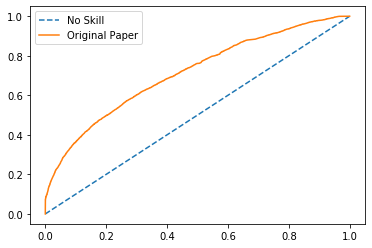

In [28]:
import matplotlib.pyplot as plt
from numpy import sqrt,argmax
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Original Paper')
plt.legend();

In [51]:
with open(dPath / "rf_exp_original_paper.pkl", 'wb') as filename:
    pickle.dump(rf,filename)

In [52]:
rf.feature_importances_

array([0.06455402, 0.00245891, 0.21185085, 0.18374246, 0.13795268,
       0.11838968, 0.00602358, 0.00594929, 0.00952252, 0.00457536,
       0.00461058, 0.00411959, 0.00488213, 0.00513995, 0.00761619,
       0.00522543, 0.00448567, 0.00540933, 0.0043226 , 0.00518936,
       0.00412923, 0.00289928, 0.00638603, 0.0055896 , 0.00408487,
       0.00552377, 0.00382761, 0.00206026, 0.00206877, 0.00244324,
       0.00394558, 0.00350031, 0.00377118, 0.00240379, 0.00210357,
       0.00551242, 0.00233361, 0.00265802, 0.00338565, 0.00286317,
       0.00380276, 0.00312178, 0.00694831, 0.00285391, 0.00419868,
       0.0005287 , 0.00236034, 0.00230624, 0.00218615, 0.00224917,
       0.00240078, 0.00485052, 0.0021467 , 0.00209689, 0.00231621,
       0.00120947, 0.00269049, 0.00251513, 0.00269921, 0.00050991,
       0.00073179, 0.00253993, 0.00080555, 0.00296101, 0.00351139,
       0.0011882 , 0.00200512, 0.00212169, 0.00245789, 0.00353262,
       0.00338081, 0.00354257, 0.00330336, 0.        , 0.00274

In [53]:
names = X_train.columns

In [54]:
feat_importances = pd.Series(rf.feature_importances_, index=names)
feat_importances.sort_values(ascending=False,inplace=True)

In [59]:
with open(dPath / "train_without_running.pkl", 'wb') as filename:
    pickle.dump([X_train,y_train],filename)

In [61]:
y_train.sum() / y_train.shape[0]

0.26013717509029743

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,  rf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.64      0.19      0.29     20633
        True       0.68      0.94      0.79     37843

    accuracy                           0.68     58476
   macro avg       0.66      0.56      0.54     58476
weighted avg       0.67      0.68      0.61     58476



In [15]:
with open(dPath / "rf_exp_original_paper.pkl", 'rb') as filename:
    rf = pickle.load(filename)

In [30]:
from sklearn import metrics
metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1] >= 0.5)

0.5649077204329341

In [32]:
metrics.balanced_accuracy_score(y_test, rf.predict(X_test), adjusted=True)

0.12981544086586827

In [22]:
metrics.matthews_corrcoef(y_test, rf.predict(X_test))

0.20531172975099113

In [33]:
metrics.log_loss(y_test, rf.predict(X_test))

11.172350898579849

In [34]:
metrics.zero_one_loss(y_test, rf.predict(X_test))

0.32346603734865587

In [60]:
with open(dPath / "test_files.pkl", 'rb') as filename:
    test_files = pickle.load(filename)

In [61]:
li = []
for file in test_files:
    df = pd.read_csv(file)
    df = df.replace('?',np.NaN)
    df[df.columns[3:]] = df[df.columns[3:]].apply(pd.to_numeric)
    df.dropna(inplace=True)
    li.append(df)

C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
test_data = pd.concat(li, ignore_index=True,axis=0)
test_data = test_data.reset_index(drop=True)

In [63]:
X_test = test_data.drop("Detected", axis=1)

In [65]:
X_test['MutatorClass'] = X_test.MutatorClass.map(mutclscodes.get)

In [68]:
y_test = test_data.Detected

In [66]:
X_test['returnType'] = X_test.returnType.map(retypecodes.get)

In [67]:
X_test

,MutatorClass,returnType,numExecuted,numTestCover,numAssertInTM,numAssertInTC,ppnumberOfClasses,ppnumberOfStatements,ppavcc,pphalsteadCumulativeBugs,...,mmhalsteadVolume,mmnumberOfOperands,mminstanceVariablesReferenced,mmlocalInstanceVariablesReferenced,mmnumberOfVariableReferences,mmvariablesReferenced,mmnumberOfOperators,mmmaxDepthOfNesting,mmnumberOfExpressions,mmnumberOfLoops
0,5,0,32,16,2,2,3.0,152.0,1.258065,1.925253,...,50.189475,7.0,0.0,0.0,2.0,1.0,7.0,0.0,1.0,0.0
1,10,2,0,0,0,0,3.0,152.0,1.258065,1.925253,...,285.000000,30.0,1.0,1.0,8.0,7.0,27.0,1.0,5.0,0.0
2,0,2,0,0,0,0,3.0,152.0,1.258065,1.925253,...,285.000000,30.0,1.0,1.0,8.0,7.0,27.0,1.0,5.0,0.0
3,0,2,0,0,0,0,3.0,152.0,1.258065,1.925253,...,285.000000,30.0,1.0,1.0,8.0,7.0,27.0,1.0,5.0,0.0
4,0,2,0,0,0,0,3.0,152.0,1.258065,1.925253,...,285.000000,30.0,1.0,1.0,8.0,7.0,27.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276234,9,1,0,0,0,0,3.0,57.0,1.000000,0.379604,...,138.301699,15.0,1.0,1.0,3.0,2.0,17.0,0.0,4.0,0.0
276235,7,1,0,0,0,0,9.0,171.0,1.045455,1.201636,...,53.774438,7.0,0.0,0.0,1.0,1.0,8.0,0.0,1.0,0.0
276236,4,1,0,0,0,0,9.0,171.0,1.045455,1.201636,...,53.774438,7.0,0.0,0.0,1.0,1.0,8.0,0.0,1.0,0.0
276237,7,1,0,0,0,0,9.0,171.0,1.045455,1.201636,...,64.725034,7.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0


In [71]:
from sklearn import metrics
metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1] >= 0.5)

0.9357703090719076

In [72]:
metrics.balanced_accuracy_score(y_test, rf.predict(X_test), adjusted=True)

0.8715406181438152

In [73]:
metrics.matthews_corrcoef(y_test, rf.predict(X_test))

0.7643396365068567

In [74]:
metrics.log_loss(y_test, rf.predict(X_test))

2.37578591696074

In [75]:
metrics.zero_one_loss(y_test, rf.predict(X_test))

0.06878463938835577

In [76]:
metrics.precision_recall_fscore_support(y_test, rf.predict(X_test))

(array([0.99017456, 0.68015   ]),
 array([0.929491  , 0.94204962]),
 array([0.95887363, 0.78995833]),
 array([238310,  37929], dtype=int64))